## 1. Importing Libraries and creating Pathname shortcut

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import colormap module
import seaborn as sns
import scipy

In [2]:
pathname=r'/Users/alejandrocisneros/Desktop/Data Analysis Coursework/Data Immersion/Achievement 4/02-2024 Instacart Basket Analysis'

In [3]:
df=pd.read_pickle(os.path.join(pathname, '2. Data', 'Prepared Data', 'ords_prods_merge_final.pkl'))

## 2. Work-through problems

<Axes: xlabel='orders_day_of_week'>

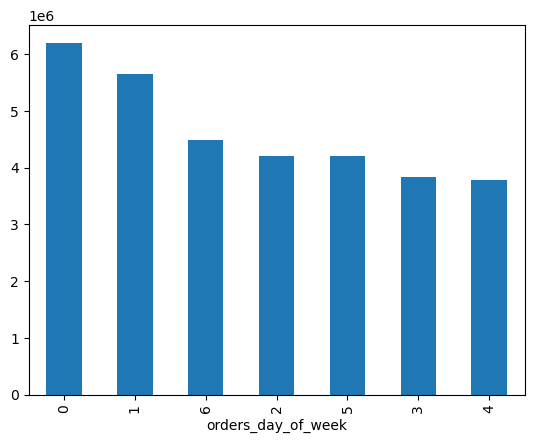

In [4]:
#Creating a bar chart with the new matplotlib library
df['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

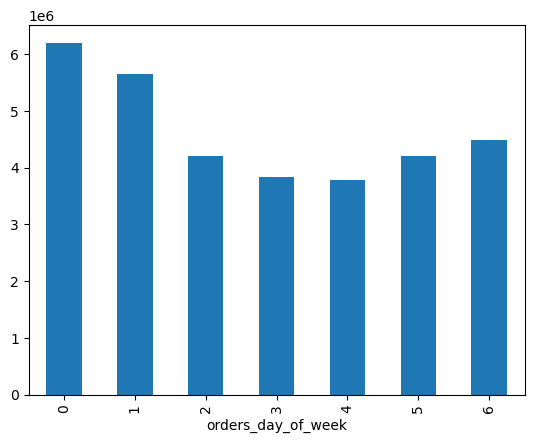

In [5]:
#The same bar chart can be organized in a different manner (i.e index order)
df['orders_day_of_week'].value_counts().sort_index().plot.bar()

### The same idea can be applied to the value.counts() function without a chart
### df['orders_day_of_week'].value_counts() orders by frequency count (largest to smallest)
### df['orders_day_of_week'].value_counts().sort_index() orders by index numbers


In [6]:
##Will not create it here for space issues but with df['orders_day_of_week'].value_counts().plot.bar(color=['color1', 'color2', etc])
#You can create a color chart

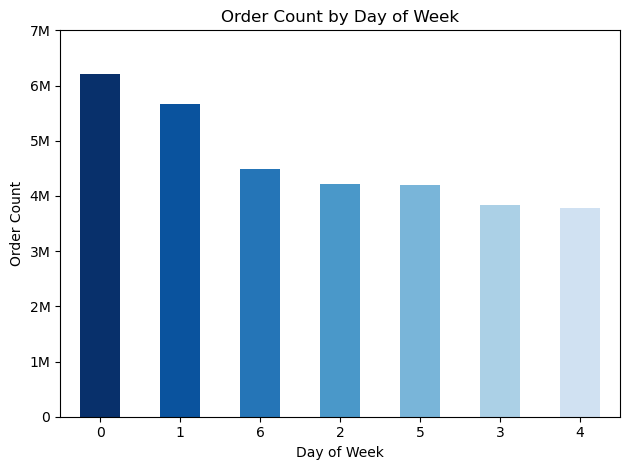

In [7]:
#Get the number of bars for creating a gradient of colors
num_bars = len(df['orders_day_of_week'].value_counts())

#Generate a range of colors from a blue colormap
colors = cm.Blues(np.linspace(1, 0.2, num_bars)) 

#Creating a chart again
df['orders_day_of_week'].value_counts().plot.bar(color=colors)

#SPECIFYING THE DETAILS OF THE CHART
plt.title('Order Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Order Count')
plt.xticks(rotation=0)
plt.ylim(0, 7000000)
plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000 ],
          ['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M'])
plt.tight_layout()
#Exporting this bar chart as an image using the .savefig() function. You can choose the export extension: in this 
#case, we will use the png extension.
plt.savefig(os.path.join(pathname, '4. Analysis', 'Visualizations', 'bar_orders_dow.png'))
plt.show()

### #Success!

### #Histograms

<Axes: ylabel='Frequency'>

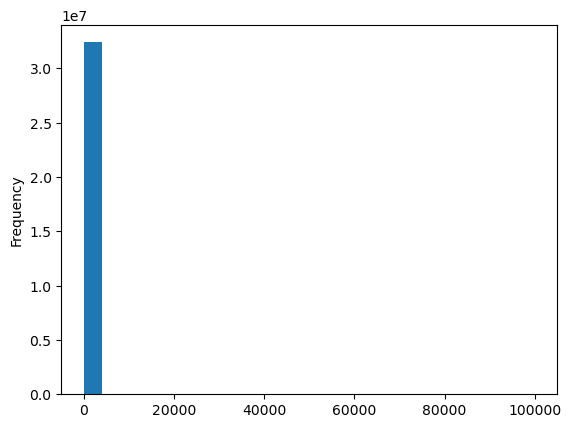

In [8]:
#Creating a histogram of the price distribution with the plot.hist() function off of the new library.
df['prices'].plot.hist(bins = 25)

### #Obviously, something is wrong with the histogram as it should not look like that. The entire point of the bins argument within the plot.hist() function is to assign 25 intervals for the data. However, this chart has created only one bar which tells us that the data is either heavily skewed (which we would have noticed) or there is something wrong/corrupted with the data.

### #To check that, we will plot a scatterplot graph using the 'prices' for both columns in an effort to understand the data better and visually see if there are any obvious outliers.

<Axes: xlabel='prices', ylabel='prices'>

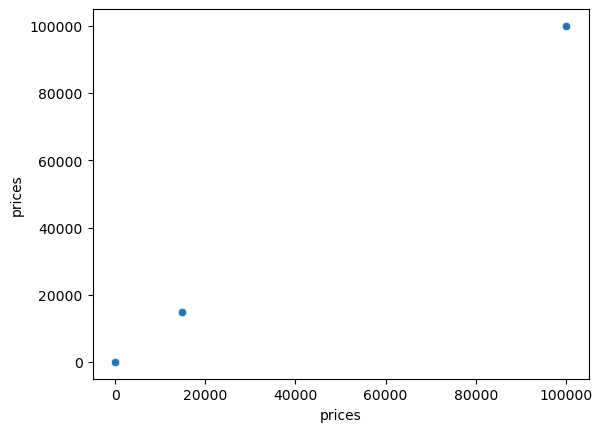

In [9]:
#Creating a scatterplot, now using the sns(seaborn) library that we imported at the beginning of the notebook.
sns.scatterplot(x='prices', y='prices',data=df)

### #Given supermarket values, we assume the regular price range is anywhere between 5 and 20 dollars. Meaning there is something seriously corrupted if we are getting several price points near the 20k and 100k mark. To figure out the issue, we will call a function that will find all rows in which the 'prices' value is over 100 dollars.

In [10]:
df.loc[df['prices']>100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,reordered,price_segment,busiest_days,busiest_hours,max_order,loyalty_flag,avg_prod_purchase_price,spender_tier,median_reorder_time,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,0,High_range product,Regularly busy,Most orders,40,Regular Customer,108.648299,High Spender,5.000000,Frequent Customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,1,High_range product,Regularly busy,Average_orders,40,Regular Customer,108.648299,High Spender,5.000000,Frequent Customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,0,High_range product,Regularly busy,Average_orders,4,New Customer,1154.792308,High Spender,11.557418,Regular Customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,1,High_range product,Busiest day,Average_orders,4,New Customer,1154.792308,High Spender,11.557418,Regular Customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,0,High_range product,Busiest day,Average_orders,16,Regular Customer,114.426619,High Spender,20.000000,Regular Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,0,High_range product,Busiest day,Average_orders,39,Regular Customer,1106.743956,High Spender,4.000000,Frequent Customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,1,High_range product,Busiest day,Average_orders,39,Regular Customer,1106.743956,High Spender,4.000000,Frequent Customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,0,High_range product,Least busy,Most orders,15,Regular Customer,451.153540,High Spender,5.000000,Frequent Customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,0,High_range product,Least busy,Average_orders,12,Regular Customer,1178.381871,High Spender,11.114836,Regular Customer


# #Re-entering data cleaning stage
### #Given that milk and cottage cheese are definitely not in the 15k and 100k price range, we are going to nulliy all 'prices' values in this dataset that are over 100 dollars. By using the following command.

In [11]:
#This function locates and replaces all 'prices' values above $100.
df.loc[df['prices'] >100, 'prices'] = np.nan

In [12]:
#Testing if it worked by calling the max value in the 'prices' column
df['prices'].max()

25.0

### Success!

# #Leaving the data cleaning stage
# #Back to histograms

<Axes: ylabel='Frequency'>

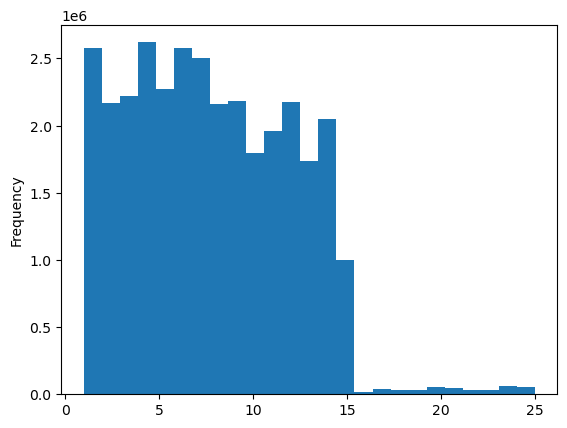

In [13]:
#Now, we will re-try the histogram function and see if works having nullified the outlier values
df['prices'].plot.hist(bins=25)

<Axes: ylabel='Frequency'>

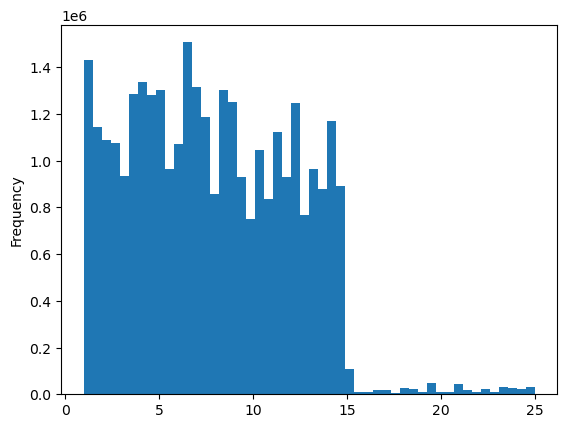

In [14]:
#If we want more detail, we can increase the number of intervals (aka 'bins') to see a higher granularity.
df['prices'].plot.hist(bins=50)

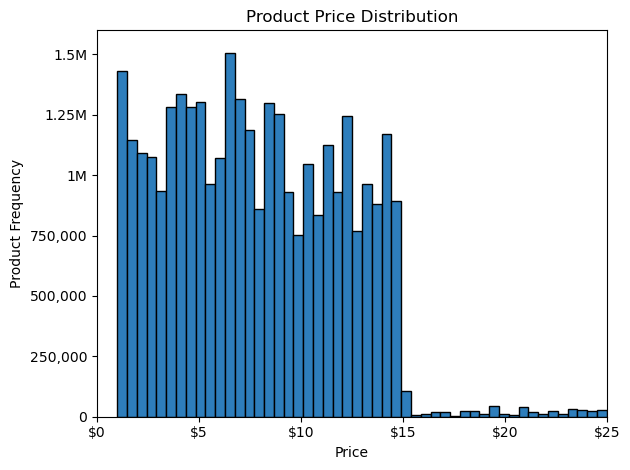

In [15]:
#Get the number of bars for creating a gradient of colors
num_bars = len(df['prices'].value_counts())

#Generate a range of colors from a blue colormap
colors = cm.Blues(np.linspace(.7, 0.2, num_bars)) 

#Creating a chart again
df['prices'].plot.hist(bins=50, color=colors, edgecolor='black')

#SPECIFYING THE DETAILS OF THE CHART
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Product Frequency')
plt.xticks(rotation=0)
plt.xlim(0, 25)
plt.xticks([0, 5, 10, 15, 20, 25],
          ['$0', '$5', '$10', '$15', '$20', '$25', ])
plt.ylim(0, 1600000)
plt.yticks([0, 250000, 500000, 750000, 1000000, 1250000, 1500000 ],
          ['0', '250,000', '500,000', '750,000', '1M', '1.25M', '1.5M'])
plt.tight_layout()
#Exporting this bar chart as an image using the .savefig() function. You can choose the export extension: in this 
#case, we will use the png extension.
plt.savefig(os.path.join(pathname, '4. Analysis', 'Visualizations', 'Product Price Distribution.png'))

plt.show()

## #Creating a randomized sample of the dataframe for future use

In [16]:
#Using numpy, we create a random but reproducible pattern with the random.seed() function
#Then, you create a new list 'dev' and apply the np.random.rand() func which creates a uniformly distributed 
#randomized values, and each number is assigned a Boolean True or False. This list is the length of the entire df 
#dataframe through the len() function.
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [17]:
#Now, in order to split the dataframe into two samples, we create two variables. big=70%
big=df[dev]

In [18]:
#Now, we create the smaller of the two samples. small=30%
small=df[~dev]

In [19]:
#Testing that they were created correctly
len(df)

32404859

In [20]:
len(big)+len(small)

32404859

In [21]:
#In order to improve memory usage and optimization, we will create a subset which contains the only two columns 
#necessary for this trial.
df2=small[['prices','orders_day_of_week']]

## Now, we will use the sample data to create line charts

/Users/alejandrocisneros/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alejandrocisneros/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


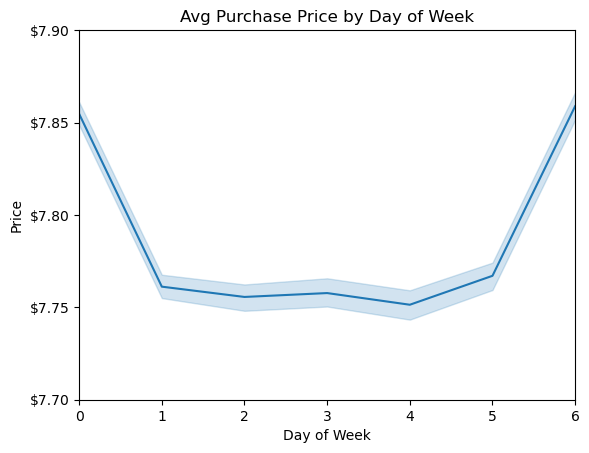

In [24]:
#Now, we can create a line chart that will allow us to see the daily variation in average product purchase price
line_chart=sns.lineplot(data = df2, x='orders_day_of_week', y='prices')
#SPECIFYING THE DETAILS OF THE CHART
plt.title('Avg Purchase Price by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.ylim(7.7, 7.9)
plt.yticks([7.70, 7.75, 7.8, 7.85, 7.9],
          ['$7.70', '$7.75', '$7.80', '$7.85', '$7.90'])
plt.xlim(0, 6)
plt.xticks([0, 1, 2, 3, 4, 5, 6])
#Exporting this line chart as an image
plt.savefig(os.path.join(pathname, '4. Analysis', 'Visualizations', 'Avg Price by DOW Line Chart.png'))

plt.show()
